# The Sparks Foundation - Data Science & Business Analytics Internship

## Task1- Prediction using Supervised Machine Learning

Predict the percentage of a student based on the number of study hours.
#### What will be the predicted score if the student studies for 9.25hrs a day?


### Author: Rabbiyah Sulman

### Step 1: Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Import the Dataset

In [2]:
df = pd.read_csv("student_scores.csv")

### Step 3: Basic Data Info 

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe() #Statistics Summary

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

In [8]:
df.size

50

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

### Step 4: Data Visualizations

In [40]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

KeyError: 'Hours'

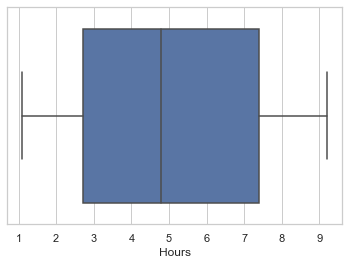

In [13]:
sns.set(style="whitegrid")
sns.boxplot(x='Hours',data=df)

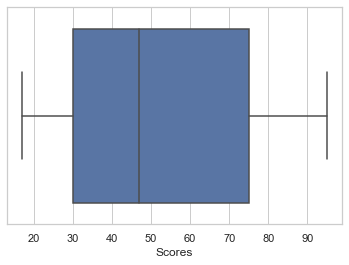

In [14]:
sns.set(style="whitegrid")
sns.boxplot(x='Scores',data=df)

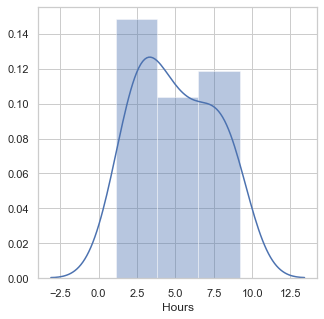

In [15]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(df['Hours'])

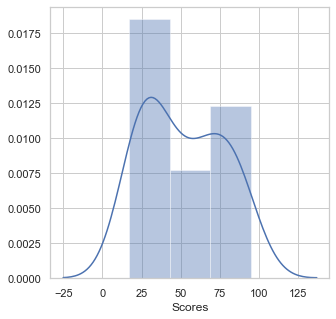

In [16]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(df['Scores'])

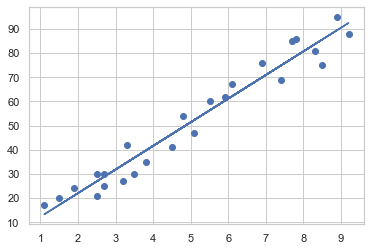

In [17]:
from scipy import stats

x = df['Hours']
y = df['Scores']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [18]:
print (r)

0.9761906560220887


The result 0.97 shows that there is a relationship, since its closer to 1 we can say that its 97% related and we can definitely use Linear Regression for predictions.

#### What will be the predicted score if the student studies for 9.25hrs a day?

In [19]:
from scipy import stats

x = df['Hours']
y = df['Scores']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

hours= myfunc(9.25)

print(hours)

92.90985477015731


If a student spends 9.25 hrs a day, his predicted score will be 92.9

## Linear Regression 

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [21]:
x= df['Hours'].values
y= df['Scores'].values

In [22]:
x.shape

(25,)

In [23]:
y.shape

(25,)

In [24]:
x= df['Hours'].values.reshape(-1,1)
y= df['Scores'].values.reshape(-1,1)

In [25]:
x.shape

(25, 1)

In [26]:
y.shape

(25, 1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression()

In [29]:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


In [30]:
y_pred = regressor.predict(x_test)

In [31]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [32]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


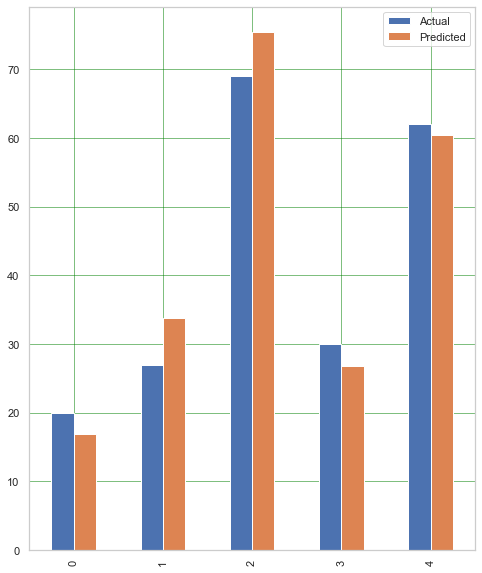

In [34]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

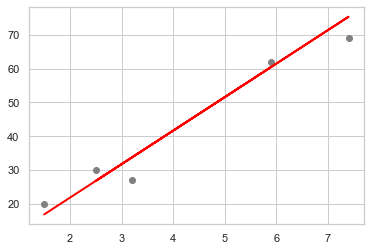

In [35]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
